In [1]:
print((7+4)%5+1)

2


In [2]:
#3 Отримайте імена стовпців набору даних

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('NationalNames.csv')

data.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

In [3]:
#4 Отримайте загальну інформацію про дані у наборі даних.
data.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


In [4]:
#5 Знайдіть кількість унікальних імен у наборі даних.

len(data['Name'].unique())

93889

In [5]:
#8 Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого Count максимальне)

popular_name = data.nlargest(1, 'Count').iloc[0]

print('The name is \'' + popular_name['Name'] + '\' in ' + str(popular_name['Year']))

The name is 'Linda' in 1947


In [6]:
#9 Підрахуйте кількість записів, для яких Count - мінімальне у наборі.
data[data['Count'] == data['Count'].min()].shape[0]

254615

In [7]:
#11 Знайдіть рік із найбільшою кількістю унікальних імен
year = data.groupby(['Year'])['Name'].nunique() 
year.nlargest(1).to_frame()

,Name
Year,
2008,32488


In [8]:
#12 Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)

data[data['Year'] == year.idxmax()].groupby(['Name'])['Count'].max().idxmax()

'Jacob'

In [9]:
#13 Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен

data[(data['Name'] == 'Jacob') & (data['Gender'] == 'F')].nlargest(1, 'Count')

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


In [10]:
#14 Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена)

data.groupby(['Year', 'Name', 'Gender']).size().unstack().query('M > 0 and F > 0').groupby('Year').size().nlargest(1).to_frame(name='Gender_neutral_names')

,Gender_neutral_names
Year,
2008,2557


In [11]:
#16 Знайдіть рік, коли народилося найбільше дітей

print(data.groupby(['Year'])['Count'].sum().idxmax())

1957


In [12]:
#17 Знайдіть кількість дівчаток та хлопчиків, які народились кожного року

data.groupby(['Year', 'Gender'])['Count'].sum().unstack()

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414


In [13]:
#18 Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків

born_data = data.groupby(['Year', 'Gender'])['Count'].sum().unstack()

print((born_data['F'] > born_data['M']).sum())

54


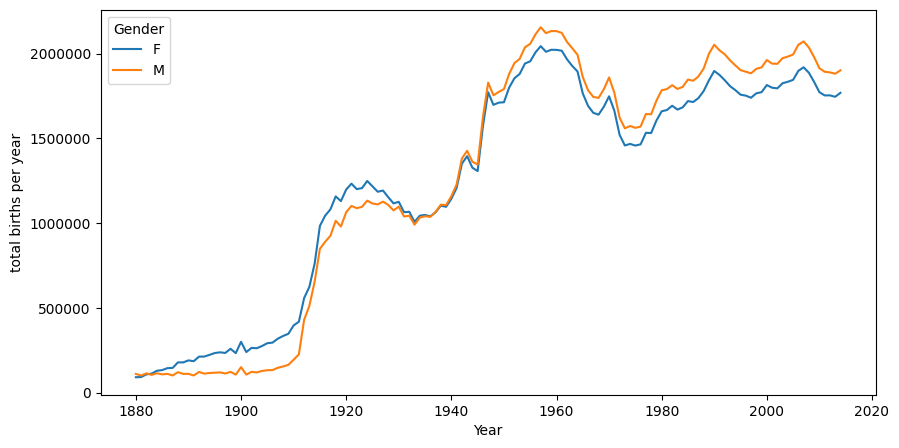

In [14]:
#19 Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік.

born_data.plot(figsize=(10,5))
plt.ylabel('total births per year')
plt.ticklabel_format(style='plain',axis='y')
plt.show()

In [ ]:
#20 Підрахуйте кількість гендерно нейтральних імен (однакових для дівчат та хлопців)

data.groupby(['Name', 'Gender']).size().unstack().query('M > 0 and F > 0').shape[0]
test = data[(data['Name'] == 'Andrew') & (data['Gender'] == 'F')]
test

,Id,Name,Year,Gender,Count


In [16]:
#22 Підрахуйте скільки років проводилось спостереження

print('\'Спостереження проводилося ' + str(data['Year'].nunique()) + ' років\'')

'Спостереження проводилося 135 років'


In [17]:
#23 Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року)

gender_neutral_names = (
    data.groupby(['Name', 'Year']).agg(
        Genders=('Gender', 'nunique'),
        Total=('Count', 'sum')
    ).reset_index()
)

gender_neutral_names = gender_neutral_names[gender_neutral_names['Genders'] == 2]

popular_names = (
    gender_neutral_names.groupby('Name').agg(
        Years=('Year', 'nunique'),
        Total=('Total', 'sum')
    ).reset_index()
)

result = (
    popular_names[popular_names['Years'] == data['Year'].nunique()]
    .sort_values('Total', ascending=False)
    .reset_index(drop=True)
)

result



,Name,Years,Total
0,James,135,5129096
1,John,135,5106590
2,Robert,135,4816785
3,William,135,4071368
4,Joseph,135,2580687
5,Jean,135,480901
6,Jesse,135,421406
7,Leslie,135,376587
8,Francis,135,312147
9,Lee,135,291691


In [18]:
#24 Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів )

data.nsmallest(1, 'Count', keep='all').groupby('Name')['Count'].sum().idxmax()


'Celester'

In [19]:
#27 Знайти найпопулярніші імена в кожному році.
data.loc[data.groupby(['Year'])['Count'].idxmax()][['Year', 'Name', 'Count']]

,Year,Name,Count
942,1880,John,9655
2938,1881,John,8769
4963,1882,John,9557
7116,1883,John,8894
9318,1884,John,9388
...,...,...,...
1657592,2010,Isabella,22883
1691633,2011,Sophia,21816
1725502,2012,Sophia,22267
1759186,2013,Sophia,21147
